In [4]:
from rnaFetch.mirTFetch import mirTFetch
from rnaFetch.FetchBioMart import GeneBiomart
from rnaFetch.mirCDSFetch import microTCDS
import pandas as pd
from pySankey.sankey import sankey

In [5]:
# run the data 
dictionary = {"GlyCCC": ["GCATTGGTGGTTCAGTGGTAGAATTCTC", 
                         "GCATTGGTGGTTCAGTGGTAGAATTCTCGCC", 
                         "GCATTGGTGGTTCAGTGGTAGAATTCT"],
             "LysTTT": ["GGGAGCGCCCGGATAGCTCAGTCGGTAGAGCATCAGACTTTT",
                        "TCGGGCGGGAGTGGTGGCTTTT",
                        "TCGGGCGGGAGTGGTGGCTTT"],
              "ThrAGT": ["TCGAATCCCAGCGGTGCCTCCA",
                         "ATCCCAGCGGTGCCTCCA",
                         "ATCCCAGCGGTGCCTCCG"],
              "AlaAGC":["GGGGATGTAGCTCAGTGG",
                        "GGGGATGTAGCTCAGTGGT",
                        "TCCCCGGCACCTCCACCA"],
              "ThrTGT":["ATCCCAGTAGAGCCTCCA",
                        "TCGAATCCCAGTAGAGCCTCCA",
                        "GTAAACCAGGGGTCGCGAGT"],
              "CysACA":["AGTGGTAGAGCATTTGACT",
                        "CAGTGGTAGAGCATTTGACT",
                        "GTGGTAGAGCATTTGACT"],
              "CysGCA":["ATCCGGGTGCCCCCTCCA"],
              "GluCTC":["TCCCTGGTGGTCTAGTGGTTAGGATTCGGCGCT",
                        "CCTGGTGGTCTAGTGGTTAGGATTCGGCGCTCT",
                        "CTGGTGGTCTAGTGGTTAGGATTCGGCGCTC"]
             }

In [6]:
# load the module
fetcht = mirTFetch("Chrome", headless = None)
fetcht.threshold = 0.90
final_table = fetcht.run_miRNA_analysis(dictionary)
fetchcds = microTCDS(final_table, threshold = 0.95)
new_table = fetchcds.run_miRNA_analysis()
overlap, grouped = fetchcds.get_mt_cds_overlap(final_table, new_table)


Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
Job is running
486 486 486
479 479 479
109 109 109
Generate GProfiles per Key
No enrichments found for CysGCA
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Deleted all suggestions
We found suggestions by microCDS, please check manually
Setted threshold successfully to 0.95
Download of the Table initialized
Download Done and added to the Slot data_per_th

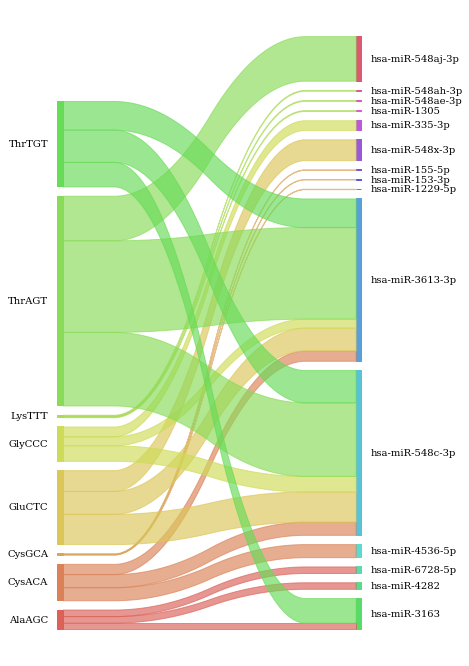

In [16]:
import matplotlib.pyplot as plt
ankey_dataframe = grouped

sankey(left=sankey_dataframe['Query'],
       right=sankey_dataframe['Mirna Name'],
       rightWeight=sankey_dataframe['count'],
       leftWeight = sankey_dataframe["count"],
       aspect=10,
       fontsize=10,
       )
# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(6, 12)

# Set the color of the background to white
fig.set_facecolor("w")

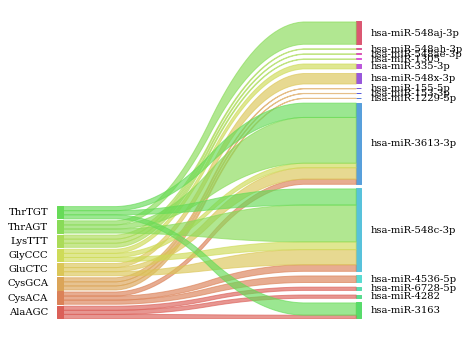

In [9]:
import numpy as np
gprofiling_visualization = fetcht.gprofiles.copy()
fetcht.get_treemap(gprofiling_visualization)
fetchcds.plot_sankey_mirna_overlap(grouped)